実際は本当に全部basicをおすすめすべきだったらどうしようと思ったのでEDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [16]:
# https://qiita.com/saka1_p/items/bb4206c6349eb61c073c
palette = sns.color_palette(['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#000000'])
sns.set_palette(palette)

In [2]:
train_file_path = "../data/20240812/train_preprocessed.csv"
train_df = pd.read_csv(train_file_path)

## ProductPitchedと各種変数の相関係数を算出

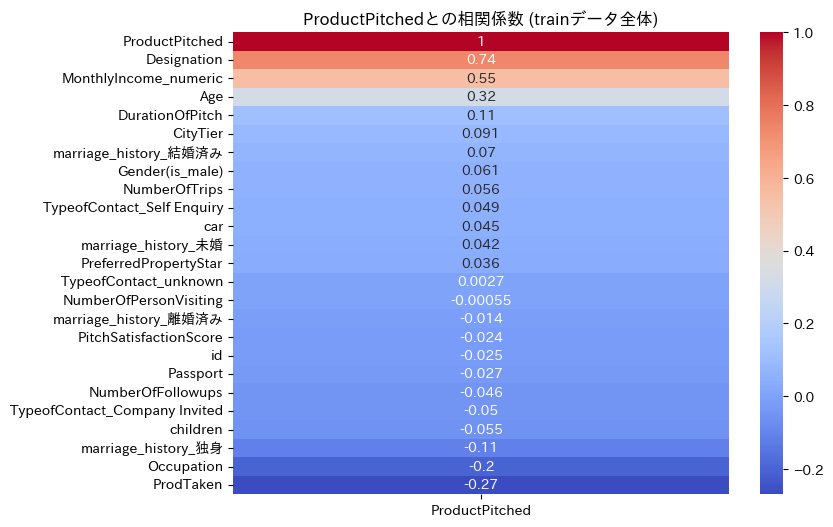

In [7]:
# train_df全体の相関係数を計算
correlation = train_df.corr()
correlation = correlation["ProductPitched"].sort_values(ascending=False)
# print(correlation)
# plot correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), cmap="coolwarm", annot=True)
plt.title("ProductPitchedとの相関係数 (trainデータ全体)")
plt.show()

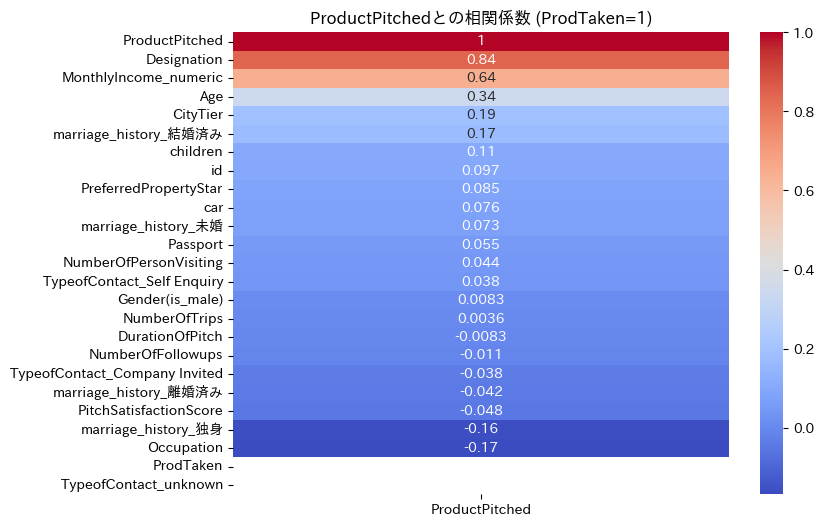

In [12]:
# ProdTaken=1のデータのみを抽出
prod_taken_df = train_df[train_df["ProdTaken"] == 1]
correlation = prod_taken_df.corr()
correlation_positive = correlation["ProductPitched"].sort_values(ascending=False)
# print(correlation)
# plot correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_positive.to_frame(), cmap="coolwarm", annot=True)
plt.title("ProductPitchedとの相関係数 (ProdTaken=1)")
plt.show()

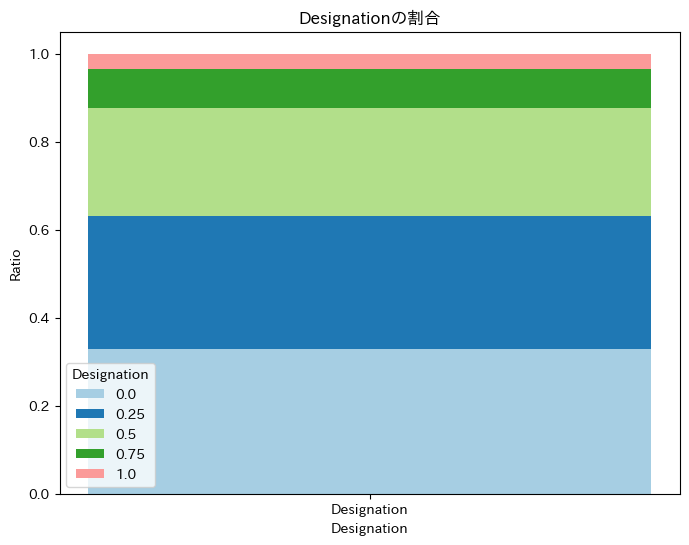

In [25]:
# データを整形して、各カテゴリの割合を計算
designation_df = train_df["Designation"].value_counts(normalize=True).reset_index()
designation_df.columns = ["Designation", "ratio"]
designation_df = designation_df.sort_values("ratio", ascending=False)

# プロットの設定
fig, ax = plt.subplots(figsize=(8, 6))

# 積み上げ棒グラフのデータ準備
bottom = 0
colors = plt.cm.Paired(range(len(designation_df)))

# 各データをプロット
for i, row in designation_df.iterrows():
    ax.bar("Designation",
           row["ratio"],
           bottom=bottom,
           color=colors[i],
           label=row["Designation"])
    bottom += row["ratio"]

# タイトルとラベルの設定
ax.set_title("Designationの割合")
ax.set_xlabel("Designation")
ax.set_ylabel("Ratio")
ax.legend(title="Designation")

# プロットの表示
plt.show()


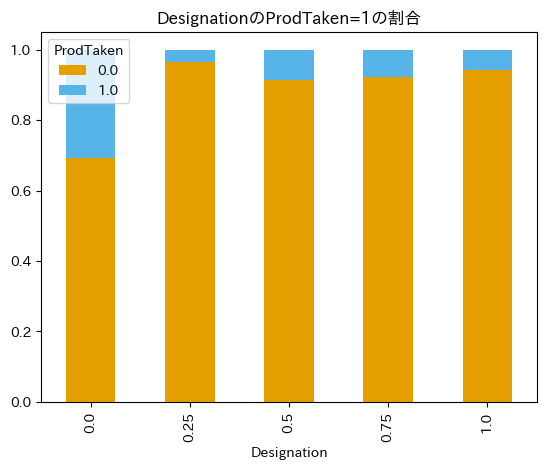

In [21]:
# Designationの各カテゴリの割合をstacked bar plotで表示
designation_df = train_df.groupby(["Designation", "ProdTaken"]).size().unstack()
designation_df = designation_df.div(designation_df.sum(axis=1), axis=0)
designation_df.plot(kind="bar", stacked=True)
plt.title("DesignationのProdTaken=1の割合")
plt.show()

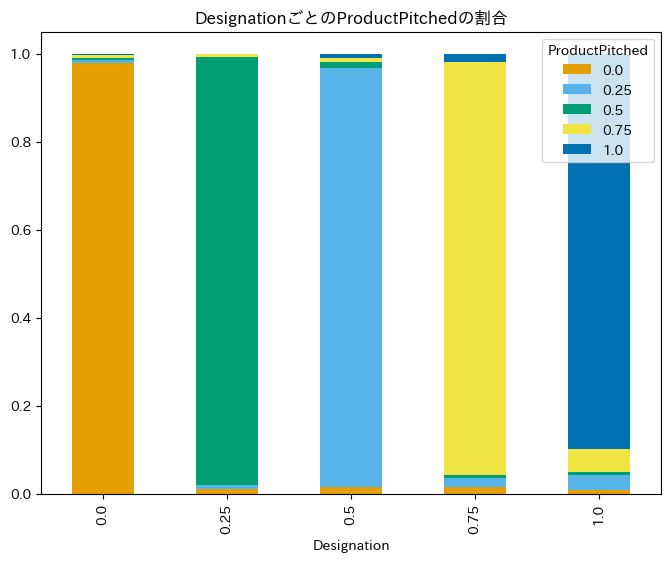

In [17]:
# DesgnationごとにProductPitchedのstacked bar plotを作成
designation_grouped = train_df.groupby("Designation")["ProductPitched"].value_counts(normalize=True).unstack()
designation_grouped.plot(kind="bar", stacked=True, figsize=(8, 6), title="DesignationごとのProductPitchedの割合")
plt.title("DesignationごとのProductPitchedの割合 (trainデータ全体)")
plt.show()

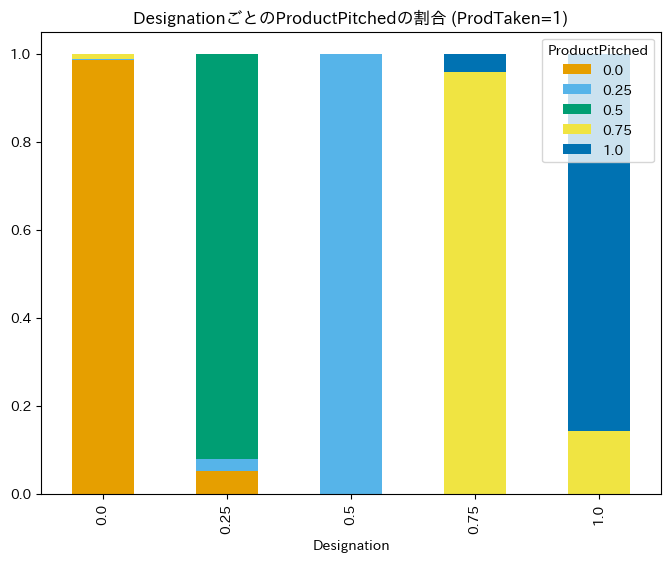

In [18]:
# ProdTaken=1のデータのみを抽出
prod_taken_df = train_df[train_df["ProdTaken"] == 1]
designation_grouped = prod_taken_df.groupby("Designation")["ProductPitched"].value_counts(normalize=True).unstack()
designation_grouped.plot(kind="bar", stacked=True, figsize=(8, 6), title="DesignationごとのProductPitchedの割合")
plt.title("DesignationごとのProductPitchedの割合 (ProdTaken=1)")
plt.show()